<a href="https://colab.research.google.com/github/mrlimoncito/limpieza_datos_y_eda/blob/main/3_ejercicios_pandas_delitos_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de incidencia delictiva en México

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('data/delitos.csv', encoding='iso-8859-1')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [ ]:
# Definición de variables para el melt. Estas variables ya están en el estado del kernel,
# pero las redefinimos aquí para asegurar la coherencia en este bloque de código.
id_vars = ['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad']
month_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Realizar el 'melt' del DataFrame original para transformar las columnas de meses en filas.
# Se especifica 'Casos_Homicidio' como el nombre de la columna que contendrá los valores.
df_melted = pd.melt(df,
                    id_vars=id_vars,
                    value_vars=month_columns,
                    var_name='Mes',
                    value_name='Casos_Homicidio')

# Filtrar el DataFrame 'df_melted' para obtener solo los registros de 'Homicidio doloso'.
# Se asume que estos filtros son necesarios para identificar correctamente los homicidios dolosos.
homicides_df = df_melted[
    (df_melted['Bien jurídico afectado'] == 'La vida y la Integridad corporal') &
    (df_melted['Tipo de delito'] == 'Homicidio') &
    (df_melted['Subtipo de delito'] == 'Homicidio doloso')
].copy() # Se usa .copy() para evitar SettingWithCopyWarning

# Definir el rango de años y los meses a incluir, según lo indicado en el ejercicio.
start_year = 2015
end_year = 2019
months_to_include = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio']

# Filtrar 'homicides_df' por el rango de años y los meses deseados.
homicides_filtered = homicides_df[
    (homicides_df['Año'] >= start_year) &
    (homicides_df['Año'] <= end_year) &
    (homicides_df['Mes'].isin(months_to_include))
].copy() # Se usa .copy() para evitar SettingWithCopyWarning

# Convertir la columna 'Casos_Homicidio' a tipo numérico, manejando posibles valores no numéricos.
# Los valores que no se puedan convertir se transformarán a NaN y luego a 0, y finalmente a entero.
homicides_filtered['Casos_Homicidio'] = pd.to_numeric(homicides_filtered['Casos_Homicidio'], errors='coerce').fillna(0).astype(int)

# Definir los estados de interés para la gráfica, tomados del estado del kernel.
states_of_interest = ['Colima', 'Guanajuato', 'Jalisco']

# Definición del mapeo de meses a números (tomado del estado del kernel).
month_mapping = {'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12}


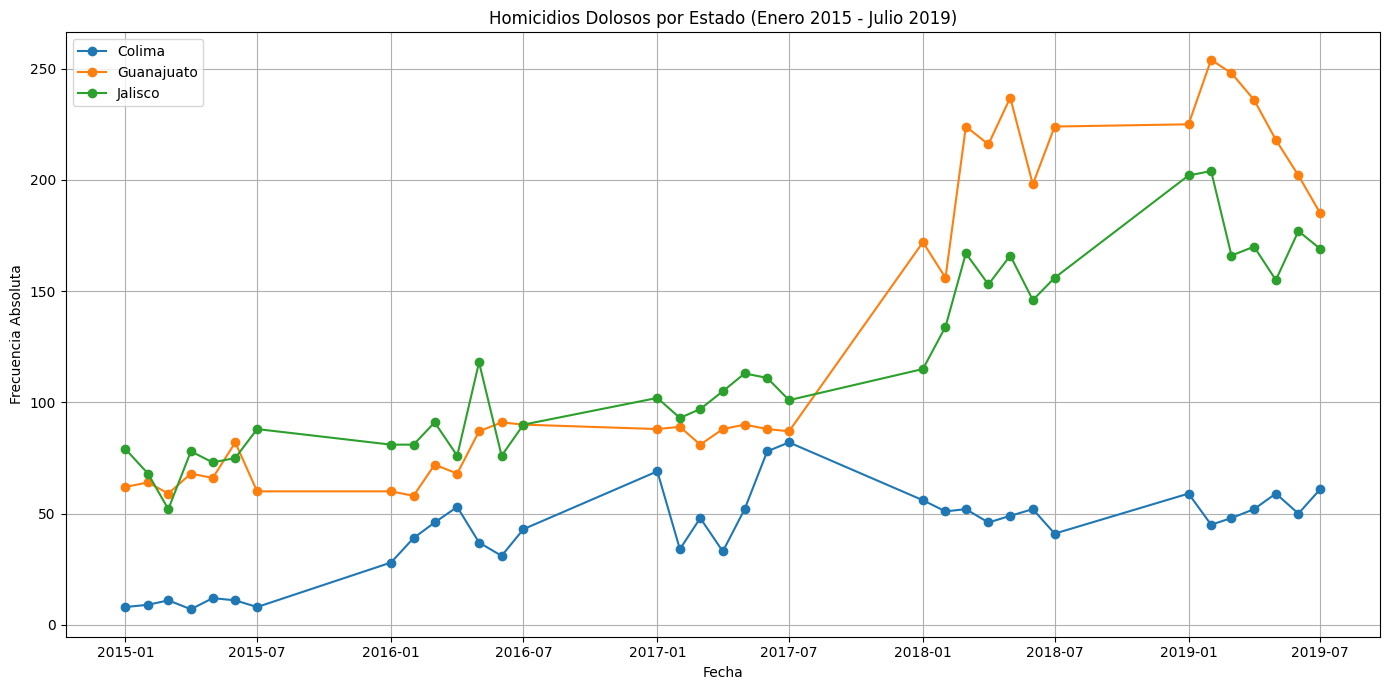

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurémonos de que 'Fecha' sea un tipo de dato de fecha para la gráfica de series de tiempo
# Convertir los nombres de los meses a números usando el diccionario month_mapping
homicides_filtered['Mes_num'] = homicides_filtered['Mes'].map(month_mapping)
homicides_filtered['Fecha'] = pd.to_datetime(homicides_filtered['Año'].astype(str) + '-' + homicides_filtered['Mes_num'].astype(str) + '-01')

plt.figure(figsize=(14, 7))
for state in states_of_interest:
    # Filtra los datos para cada estado
    state_data = homicides_filtered[homicides_filtered['Entidad'] == state]
    # Agrupa por fecha y suma los casos para obtener la frecuencia absoluta mensual
    monthly_frequency = state_data.groupby('Fecha')['Casos_Homicidio'].sum().reset_index()
    plt.plot(monthly_frequency['Fecha'], monthly_frequency['Casos_Homicidio'], label=state, marker='o', linestyle='-')

plt.title('Homicidios Dolosos por Estado (Enero 2015 - Julio 2019)')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia Absoluta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [ ]:
# Esto es importante ya que df_melted contiene todos los tipos de delito y sus casos
df_melted['Casos_Homicidio'] = pd.to_numeric(df_melted['Casos_Homicidio'], errors='coerce').fillna(0).astype(int)

# --- Pregunta 1: ¿Cuántos homicidios dolosos hubo en Colima en el 2018? ---
# Se utiliza homicides_df ya que ya está filtrado para homicidios dolosos y los datos son correctos de acuerdo al kernel
homicidios_colima_2018 = homicides_df[
    (homicides_df['Entidad'] == 'Colima') &
    (homicides_df['Año'] == 2018)
]
total_homicidios_colima_2018 = homicidios_colima_2018['Casos_Homicidio'].sum()
print(f"1. En Colima hubo {total_homicidios_colima_2018} homicidios dolosos en el 2018.")

print("\n" + "-"*50 + "\n") # Separador para mejor lectura

# --- Pregunta 2: ¿Cuantos robos de vehículo automotor ha habido en el 2019? ---
robos_vehiculo_2019 = df_melted[
    (df_melted['Tipo de delito'] == 'Robo de vehículo') &
    (df_melted['Subtipo de delito'] == 'Robo de vehículo automotor') &
    (df_melted['Año'] == 2019)
]
total_robos_vehiculo_2019 = robos_vehiculo_2019['Casos_Homicidio'].sum()
print(f"2. En 2019 hubo {total_robos_vehiculo_2019} robos de vehículo automotor.")

print("\n" + "-"*50 + "\n") # Separador para mejor lectura

# --- Pregunta 3: Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año. ---
delitos_interes = df_melted[
    (df_melted['Subtipo de delito'].isin(['Homicidio doloso', 'Feminicidio']))
]
suma_por_año = delitos_interes.groupby('Año')['Casos_Homicidio'].sum().reset_index()
print("3. Suma de homicidios dolosos y feminicidios por año en toda la República Mexicana:")
print(suma_por_año)

print("\n" + "-"*50 + "\n") # Separador para mejor lectura

# --- Pregunta 4: ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios? ---
# Nota: El dataframe no contiene información a nivel de 'Municipio', por lo que se responderá a nivel de 'Entidad'.
feminicidios = df_melted[
    (df_melted['Subtipo de delito'] == 'Feminicidio')
]
feminicidios_por_mes_entidad = feminicidios.groupby(['Mes', 'Entidad'])['Casos_Homicidio'].sum().reset_index()
max_feminicidios_mes_entidad = feminicidios_por_mes_entidad.loc[feminicidios_por_mes_entidad['Casos_Homicidio'].idxmax()]
print("4. El mayor número de feminicidios ha ocurrido:")
print(f"   - Mes: {max_feminicidios_mes_entidad['Mes']}")
print(f"   - Entidad (en lugar de Municipio): {max_feminicidios_mes_entidad['Entidad']}")
print(f"   - Cantidad: {max_feminicidios_mes_entidad['Casos_Homicidio']}")

print("\n" + "-"*50 + "\n") # Separador para mejor lectura

# --- Pregunta 5: ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios? ---
feminicidios_por_año_estado = feminicidios.groupby(['Año', 'Entidad'])['Casos_Homicidio'].sum().reset_index()
max_feminicidios_año_estado = feminicidios_por_año_estado.loc[feminicidios_por_año_estado['Casos_Homicidio'].idxmax()]
print("5. El mayor número de feminicidios ha ocurrido:")
print(f"   - Año: {max_feminicidios_año_estado['Año']}")
print(f"   - Estado: {max_feminicidios_año_estado['Entidad']}")
print(f"   - Cantidad: {max_feminicidios_año_estado['Casos_Homicidio']}")

1. En Colima hubo 617.0 homicidios dolosos en el 2018.

--------------------------------------------------

2. En 2019 hubo 0 robos de vehículo automotor.

--------------------------------------------------

3. Suma de homicidios dolosos y feminicidios por año en toda la República Mexicana:
    Año  Casos_Homicidio
0  2015            16532
1  2016            20756
2  2017            25777
3  2018            29995
4  2019            30445
5  2020            29786
6  2021            29263
7  2022            27240
8  2023            26119
9  2024            13255

--------------------------------------------------

4. El mayor número de feminicidios ha ocurrido:
   - Mes: Agosto
   - Entidad (en lugar de Municipio): México
   - Cantidad: 95

--------------------------------------------------

5. El mayor número de feminicidios ha ocurrido:
   - Año: 2020
   - Estado: México
   - Cantidad: 151


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

/tmp/ipython-input-4245775205.py:45: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


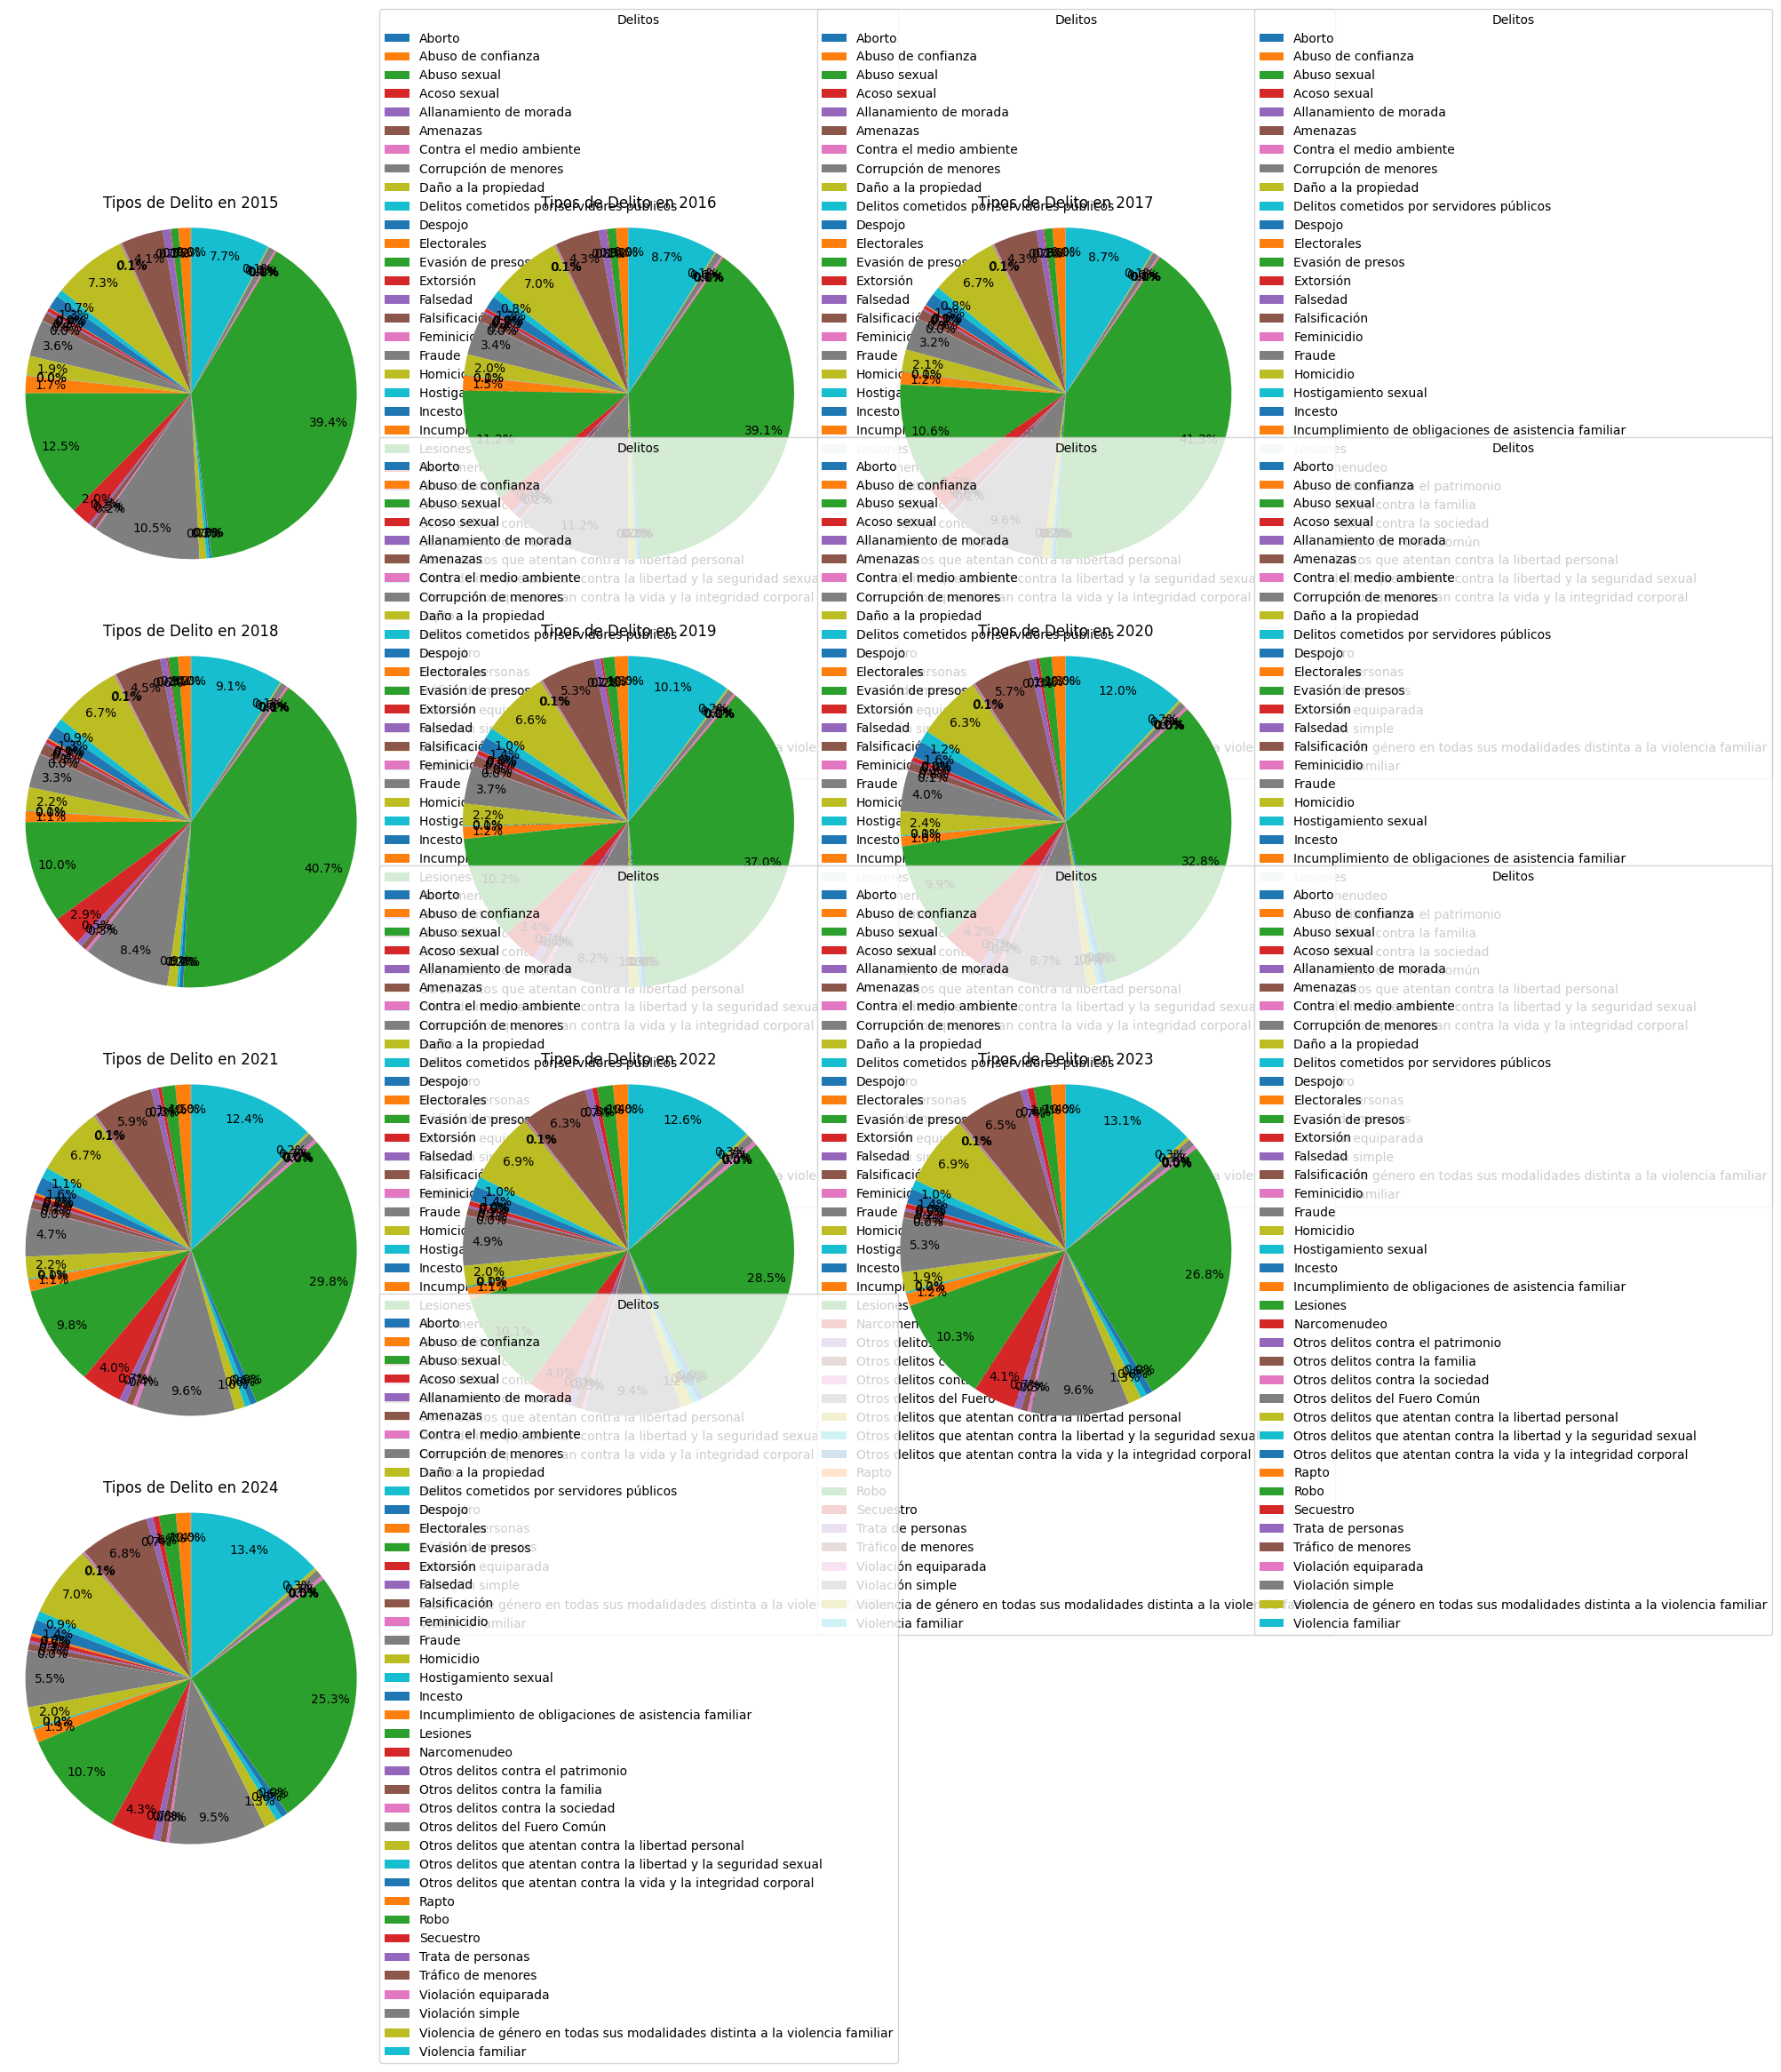

In [ ]:

# Asegurarse de que 'Casos_Homicidio' sea numérica
df_melted['Casos_Homicidio'] = pd.to_numeric(df_melted['Casos_Homicidio'], errors='coerce').fillna(0).astype(int)

# Agrupar por año y tipo de delito y sumar los casos
crimes_by_year_type = df_melted.groupby(['Año', 'Tipo de delito'])['Casos_Homicidio'].sum().reset_index()

# Obtener la lista de años únicos y ordenarlos
years = sorted(crimes_by_year_type['Año'].unique())

# Determinar el número de filas y columnas para los subplots
num_years = len(years)
num_cols = 3  # Por ejemplo, 3 columnas por fila
num_rows = (num_years + num_cols - 1) // num_cols # Calcular filas necesarias

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

for i, year in enumerate(years):
    ax = axes[i]
    year_data = crimes_by_year_type[crimes_by_year_type['Año'] == year]

    # Filtrar delitos con 0 casos para no mostrarlos en el pastel y evitar errores
    year_data = year_data[year_data['Casos_Homicidio'] > 0]

    # Si no hay datos para el año, se puede mostrar un mensaje o simplemente ocultar el subplot
    if year_data.empty:
        ax.text(0.5, 0.5, f'No hay datos de delitos para {year}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Tipos de Delito en {year}')
        ax.axis('off') # Ocultar el eje si no hay datos
        continue

    # Crear el gráfico de pastel
    wedges, texts, autotexts = ax.pie(year_data['Casos_Homicidio'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    ax.set_title(f'Tipos de Delito en {year}')
    ax.axis('equal') # Asegura que el pastel se dibuje como un círculo.

    # Añadir leyenda fuera del pastel para evitar superposición
    ax.legend(wedges, year_data['Tipo de delito'], title="Delitos", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ocultar subplots vacíos si el número total de subplots es mayor que el número de años
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data